In [4]:
#impotando aa bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [5]:
df = pd.read_excel('/content/heart_train.xlsx')

#dimensão do dataset
print("O dataset possui {} linhas (registros) e {} colunas (features)".format(df.shape[0], df.shape[1]))


O dataset possui 208 linhas (registros) e 14 colunas (features)


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0
1,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
2,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1
3,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
4,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0


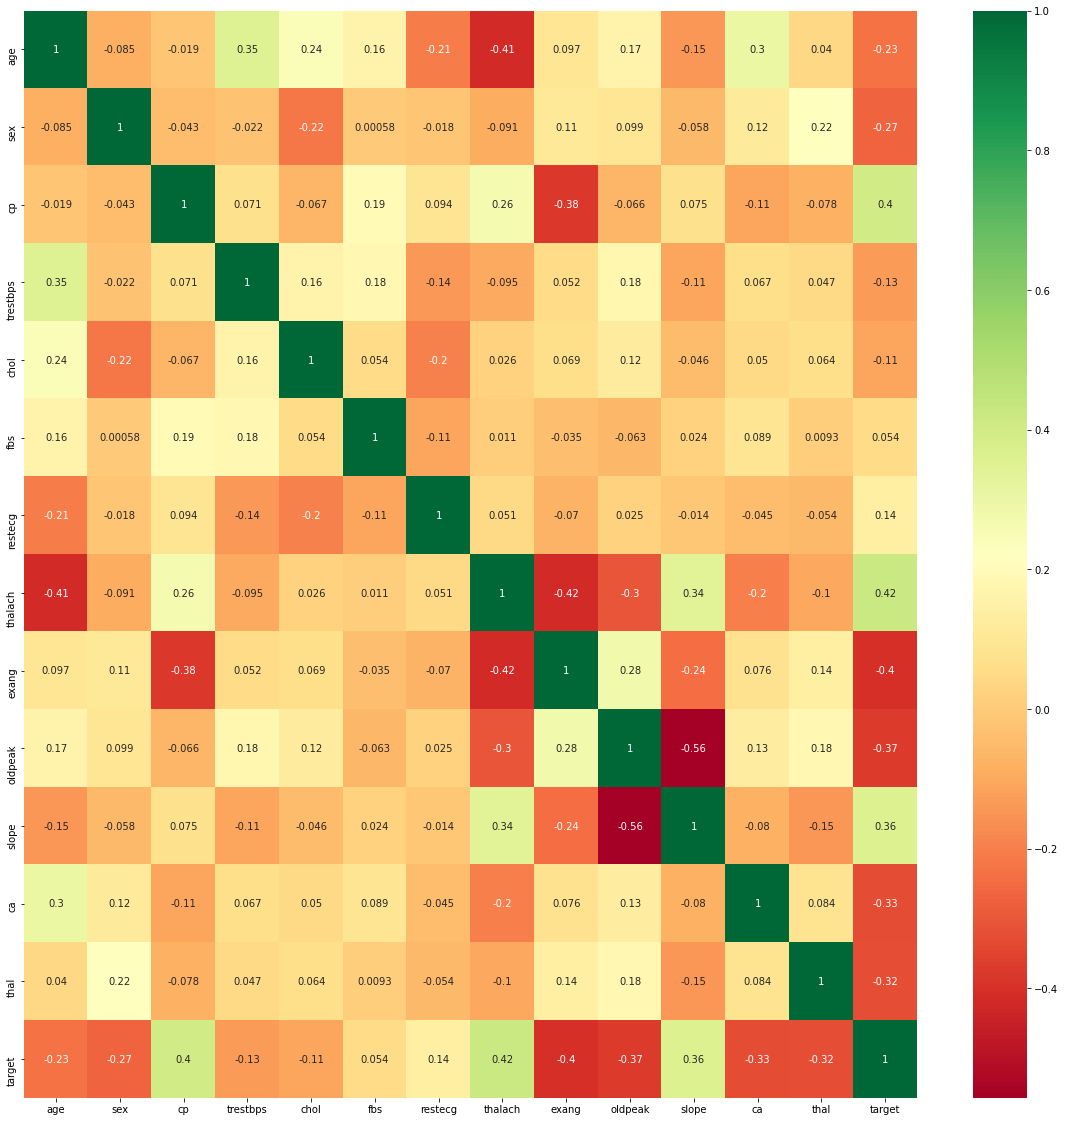

In [7]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

# criando outro dataframe com novas colunas para o método one-hot
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Escalando as variáveis que não são categoricas
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])



Aplicação da Regressão Logística

In [9]:
#Usando sklearn 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_squared_error,r2_score, f1_score

# Deseja-se prever o target
Y = dataset.copy().pop('target')
X = dataset.copy().drop(columns='target')
# fazemos o split
y_train, y_test, X_train, X_test = train_test_split(Y, X, test_size = 0.30, random_state=20)

In [10]:
#Usando skelarn
reg_ols = LogisticRegression()

#treinando o model
reg_ols.fit(X_train, y_train)

print("Coeficientes: {}".format(reg_ols.coef_))
print("Intercept: {}".format(reg_ols.intercept_))

#salvando nossas predicoes
preds_ols_sklearn = reg_ols.predict(X_test)
print('RMSE: %.4f'% mean_squared_error(y_test,preds_ols_sklearn))
print('R2: %.2f'% r2_score(y_test,preds_ols_sklearn))
print('f1_score: %.2f'% f1_score(y_test, preds_ols_sklearn))


Coeficientes: [[ 0.38786613 -0.38046618 -0.10058796  0.59952096 -0.23026461  0.51099704
  -0.51101556 -1.08982291 -0.02748477  0.395664    0.72162516 -0.09456526
   0.09454674 -0.22041797  0.37771903 -0.15731958  0.33453571 -0.33455423
  -0.07077569 -0.54840879  0.61916597  1.10828214  0.14595049 -1.44757132
  -0.49780313  0.69112331  0.32301285  0.42370223 -0.7467336 ]]
Intercept: [0.0386132]
RMSE: 0.1270
R2: 0.48
f1_score: 0.89
